In [57]:
"""
Visualizing vortex leapfrogging
@author : Zhongan Lin
"""

import numpy as np
import matplotlib.pyplot as plt

In [58]:
dt = 0.01
Nsteps = 10
k = 3
line_density = 1.5

# Setting up initial conditions (vortex centres and circulation) 
# Vortex rings
y_v = 4*np.array([1,1,-1,-1]) #Positions of vortex centers
x_v = 4*np.array([-1,1,-1,1])
k_v = np.array([k,k,-k,-k]) #Circulation of vortices

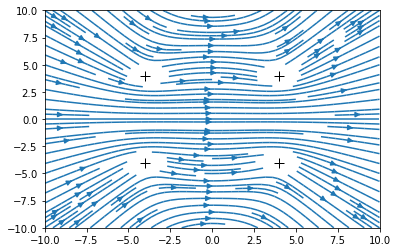

In [61]:
# Setting up the plot
plt.ion()
fig , ax = plt.subplots(1,1)

# mark the initial positions of vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)

# play around with the marker size and type as you see fit
# draw the initial velocity streamline
ngrid = 10
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j]
#360j sets the resolution of the cartesian grid; play around with it as you see fit

vel_x = np.zeros(np.shape(Y)) #this holds x−velocity 
vel_y = np.zeros(np.shape(Y)) #this holds y−velocity

# masking radius for better visualization of the vortex centres 
r_mask = 1
# within this mask, you will not plot any streamline
#so that you can see more clearly the movement of the vortex centres

for i in range(len(x_v)): #looping over each vortex
    # computing the total velocity field
    xi = x_v[i] ; yi = y_v[i]
    k = k_v[i]
    dx = X - xi; dy = Y - yi
    r = np.sqrt(dx**2 + dy**2)
    vel_x += -k*dy/r # phi-hat perpendicular to r
    vel_y += k*dx/r
    # insert lines for masking (set the masking area to NaN)
    vel_x[r < r_mask] = np.NaN
    vel_y[r < r_mask] = np.NaN
    
# set up the boundaries of the simulation box 
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])
# initial plot of the streamlines 
ax.streamplot(X, Y, vel_x , vel_y , density=[line_density,line_density])
# play around with density as you see fit; #see the API documentation for more detail
fig.canvas.draw()

In [60]:
# Evolution
count = 0
while count < 1 :
    # Initialize advection velocities of the vortices
    Vx = np.zeros(np.shape(y_v))
    Vy = np.zeros(np.shape(y_v))
    # compute the total advection velocity on each vortex
    for i in range(len(x_v)):
        xi = x_v[i] ; yi = y_v[i]
        for j in range(len(x_v)): # speed of vortex i due to vortex j
            if j == i:
                continue
            k = k_v[j]
            xj = x_v[j] ; yj = y_v[j]
            dx = xi - xj ; dy = yi - yj
            r = np.sqrt(dx**2 + dy**2)
            Vx[i] += -k*dy/r
            Vy[i] += k*dx/r

    # update the positions of vortices
    for i in range(len(x_v)):
        xi += Vx[i]*dt
        yi += Vy[i]*dt
        
    # insert lines to re−initialize the total velocity field
    vel_x = np.zeros(np.shape(Y)) #this holds x−velocity 
    vel_y = np.zeros(np.shape(Y)) #this holds y−velocity
    for i in range(len(x_v)):
        # insert lines to update the streamlines and masking
        # computing the total velocity field
        xi = x_v[i] ; yi = y_v[i]
        k = k_v[i]
        dx = X - xi; dy = Y - yi
        r = np.sqrt(dx**2 + dy**2)
        vel_x += -k*dy/r # phi-hat perpendicular to r
        vel_y += k*dx/r
        # insert lines for masking (set the masking area to NaN)
        vel_x[r < r_mask] = np.NaN
        vel_y[r < r_mask] = np.NaN

    # update plot
    # the following two lines clear out the previous streamlines
#     ax.collections = []
    ax.clear()
#     ax.patches = []
    p.set_xdata(x_v) 
    p.set_ydata(y_v)
    ax.streamplot(X, Y, vel_x , vel_y , density=[line_density,line_density])
    fig.canvas.draw()
    plt.pause(0.1) #play around with the delay time for better visualization
    count += 1